#### CSC 180 Intelligent Systems

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento

# Special Lecture 2:  Pretrained Transformers for Solving NLP Tasks with Hugging Face

## A. Hugging Face Pipelines

Hugging Face uses **Pipelines** as an API that through the `pipeline()` method allows performing inference over a variety of tasks.

```
from transformers import pipeline

# Pipeline to use an existing or custom model and tokenizer
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```

Among the currently available task pipelines are:

- Sentiment-analysis
- Question-answering
- Translation
- Summarization
- Text-generation
- NER (named entity recognition)
- Zero-shot-classification
- Fill-mask

In [1]:
!pip install -q transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### 1 Sentiment Analysis <a name='21.3.1-sentiment-analysis'></a>

The first example uses `pipeline()` for sentiment analysis. When the cell is executed, the pipeline will select a default pretrained model for sentiment analysis in English, it will download the model and the related tokenizer, and it will instantiate a text classifier object.

In [6]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis", device=0)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In the next cell, the classifier is applied to a sentence. The output is the predicted label and the confidence score.

In [7]:
classifier("I enjoy learning AI in CSC180 so much!")

[{'label': 'POS', 'score': 0.9927881360054016}]

In [8]:
classifier(
    ["I enjoy learning AI in CSC180.", "I hate this work so much!"]
)

[{'label': 'POS', 'score': 0.992340087890625},
 {'label': 'NEG', 'score': 0.9819007515907288}]

### 2 Question Answering <a name='21.3.2-question-answering'></a>

This pipeline answers questions using information from a given context. Such pipeline can be very useful when we are dealing with long text data and finding answers to questions in the document can take time.

In [9]:
oracle = pipeline(
    "question-answering", model="distilbert/distilbert-base-cased-distilled-squad", device=0
)

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [10]:
input_1 = {
    "question" : "Why the sky is blue?",
    "context" : "Blue is scattered more than other colors because it travels as shorter, smaller waves. This is why we see a blue sky most of the time",
    }

oracle (input_1)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


{'score': 0.595852792263031,
 'start': 49,
 'end': 85,
 'answer': 'it travels as shorter, smaller waves'}

### 3 Machine Translation <a name='21.3.3-machine-translation'></a>

For machine translation, we can provide source and target languages in the pipeline, as in the next cell where the task `"translation_en_to_fr"` is to translate text from English to French. Although this pipeline can work with several languages, most often, machine translation requires to specify the name of the used language model, and only for several special cases it can work by specifying only the task name.

In [12]:
translator = pipeline("translation_en_to_fr", device=0)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
translator("I am a student")

[{'translation_text': 'Je suis un étudiant'}]

In [14]:
translator("I enjoy learning aritifical intelligence in CSC180 so much.")

[{'translation_text': "J'apprécie beaucoup l'apprentissage de l'intelligence aritifique dans le CSC180."}]

### 4 Text Summarization <a name='21.3.4-text-summarization'></a>

Text summarization reduces a longer text into a shorter summary.

In [15]:
summarizer = pipeline("summarization", device=0)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [16]:
summarizer(
    """
   Meta recently unveiled its latest language model, Llama 3.1 405B.
   This AI model is the largest of the new Llama models, which also include 8B and 70B versions.
   With 405 billion parameters, 15 trillion tokens, and 16,000 GPUs,
   Llama 3.1 405B offers a range of impressive features.

    The open-source models have a context window of 128k tokens, meaning users can enter hundreds
    of pages of content in their prompts. They are multilingual, with support for eight languages:
    English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai. The models also come
    with tools for web search, math reasoning, and code execution.

    "Compared to prior versions of Llama (Touvron et al., 2023a,b),
     we improved both the quantity and quality of the data we use for pre-training and post-training.
     These improvements include the development of more careful pre-processing and curation pipelines
     for pre-training data and the development of more rigorous quality assurance and filtering approaches
     for post-training data. We pre-train Llama 3 on a corpus of about 15T multilingual tokens, compared
     to 1.8T tokens for Llama 2," Meta wrote.

One of the most significant aspects of the Llama 3.1 models is that they are open source. Users can download
the weights and use them in their applications. Its benchmark scores are close to, and sometimes even surpass,
those of GPT-4o and Claude 3.5 Sonnet. Results can be seen in the model card.
""", min_length=20, max_length=60
)

[{'summary_text': ' Meta recently unveiled its latest language model, Llama 3.1 405B . The open-source models have a context window of 128k tokens . They are multilingual, with support for eight languages: English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai'}]

### 5 Text Generation <a name='21.3.5-text-generation'></a>

In this example, we will use the `"text-generation"` pipeline to generate text based on a provided prompt.

In [17]:
generator = pipeline("text-generation", device=0)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Now let’s provide a prompt text to the generator object, and the generator will continue the text. Note that text generation involves randomness, so some of the outputs will not be perfect. And admittedly, this is one of the most difficult NLP tasks.

In [18]:
outputs_1 = generator("In this deep learning course, we will teach you how to")

print(outputs_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In this deep learning course, we will teach you how to program your own data in different ways to learn about the data.

The purpose of this course is to introduce you to deep learning, how to design a neural network using the latest neural


In [19]:
outputs_2 = generator("Golden Gate Bridge is a famous world attractation")

print(outputs_2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Golden Gate Bridge is a famous world attractation. It was located on a 3,500-acre river and was one of the major attractions of Oakland.


### 6 Named Entity Recognition <a name='21.3.6-named-entity-recognition'></a>

Named Entity Recognition (NER), also known as named entity tagging, is a task of identifying parts of the input that represent entities. Examples of entities are:

- Location (LOC)
- Organizations (ORG)
- Persons (PER)
- Miscellaneous entities (MISC)

In [20]:
ner = pipeline("ner", grouped_entities=True, device=0)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [21]:
text_1 = "Abraham Lincoln was a president who lived in the United States."

print(ner(text_1))

[{'entity_group': 'PER', 'score': 0.9988935, 'word': 'Abraham Lincoln', 'start': 0, 'end': 15}, {'entity_group': 'LOC', 'score': 0.99965084, 'word': 'United States', 'start': 49, 'end': 62}]


Or, we can use Pandas to display the output.

In [22]:
import pandas as pd

text_2 = """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.

    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.

    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”

    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.

    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """

pd.DataFrame(ner(text_2))

,entity_group,score,word,start,end
0,LOC,0.434807,BA,0,2
1,LOC,0.999473,Iraq,38,42
2,MISC,0.893630,Assyrian,132,140
3,LOC,0.782092,Empire,141,147
4,LOC,0.999238,Mosul,256,261
5,LOC,0.999156,Iraq,263,267
6,LOC,0.971527,Mashki Gate,348,359
7,ORG,0.997262,Islamic State,384,397
8,PER,0.999300,Fadhil Mohammed,428,443
9,LOC,0.974939,Mashki Gate,592,603


### 7 Zero-shot Classification <a name='21.3.7-zero-shot-classification'></a>

Zero-shot classification is a task to classify text documents with labels that do not appear in the training data

In [23]:
classifier = pipeline("zero-shot-classification",  device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The pipeline allows us to list `candidate labels` to be used for the classification. For this example, the model returned confidence scores for each category, and the highest probability was assigned to the "sports" category.

In [24]:
classifier(
    "Lionel Messi, a forward for Inter Miami CF, is one of the world’s greatest soccer players and helped the Argentina national team win its third FIFA World Cup in 2022.",
    candidate_labels=["education", "politics", "business", "sports"],
)

{'sequence': 'Lionel Messi, a forward for Inter Miami CF, is one of the world’s greatest soccer players and helped the Argentina national team win its third FIFA World Cup in 2022.',
 'labels': ['sports', 'business', 'education', 'politics'],
 'scores': [0.9972645044326782,
  0.0012375443475320935,
  0.0008546465542167425,
  0.0006433354574255645]}

### 8 Mask Filling <a name='21.3.8-mask-filling'></a>

The pipeline with the `fill-mask` task is used to fill in blanks in an input text.

In [25]:
mask_filling = pipeline("fill-mask", device=0)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

We can provide the `top_k` argument to indicate the number of returned answers.

In [26]:
mask_filling("Lionel Messi is a <mask> for Inter Miami CF.", top_k=5)

[{'score': 0.27984145283699036,
  'token': 5732,
  'token_str': ' midfielder',
  'sequence': 'Lionel Messi is a midfielder for Inter Miami CF.'},
 {'score': 0.15396881103515625,
  'token': 5955,
  'token_str': ' striker',
  'sequence': 'Lionel Messi is a striker for Inter Miami CF.'},
 {'score': 0.1262887418270111,
  'token': 869,
  'token_str': ' player',
  'sequence': 'Lionel Messi is a player for Inter Miami CF.'},
 {'score': 0.07928568124771118,
  'token': 5142,
  'token_str': ' defender',
  'sequence': 'Lionel Messi is a defender for Inter Miami CF.'},
 {'score': 0.07618781924247742,
  'token': 7551,
  'token_str': ' goalkeeper',
  'sequence': 'Lionel Messi is a goalkeeper for Inter Miami CF.'}]

# B. Now let's go into the box for pipelines:  Exploring Tokenizers and Models seperately

## Tokenizers <a name='21.4-tokenizers'></a>

**Tokenizers** is used to split input text data into tokens (e.g., words, characters, N-grams), and map the tokens to integers.

When we use a pretrained model from Hugging Face for a downstream task, our text data needs to be preprocessed in the same way as the training data used with the model.

***Therefore, the tokenizer we load MUST MATCH the specific model we plan to use***.


In [29]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

Let's now use the `tokenizer` to convert sentences into a sequence of integers, and display the output.

The ouput of the tokenizer is a dictionary consisting of two key-value pairs:

- `input_ids`, a list of integers, where each index identifies a token. The indexing is based on the vocabulary of the training data that was used to train the model `"distilbert-base-uncased"`.
- `attention_mask`, a list of 1's or 0's, to indicate padding of the text sequence. This sentence does not have padding, since all elements have an attention mask of 1's. The attention mask ensures that the attention mechanism in Transformer is applied only to the real tokens, and the padding tokens are ignored.

In [30]:
output_tokens_1 = tokenizer('Deep Learning has found its application in almost every sector of business.')
print(output_tokens_1)

{'input_ids': [101, 2784, 4083, 2038, 2179, 2049, 4646, 1999, 2471, 2296, 4753, 1997, 2449, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


To understand better how the tokenization was performed, in the next cell we used the method `covert_ids_to_tokens()` to obtain the text for each integer value. Now we can see that the tokenizer places special tokens at the beginning and end of each sequence. `[CLS]` is placed at the beginning (it stands for Classification), and `[SEP]` is placed at the end of the sequence (it stands for Separate).

In [31]:
tokenizer.convert_ids_to_tokens(output_tokens_1.input_ids)

['[CLS]',
 'deep',
 'learning',
 'has',
 'found',
 'its',
 'application',
 'in',
 'almost',
 'every',
 'sector',
 'of',
 'business',
 '.',
 '[SEP]']

Most tokenizers in Hugging Face assign integers for the special tokens between 100 and 103.

These special tokens include:

- \[PAD\], padding.
- \[UNK\], unknown token.
- \[CLS\], sequence beginning.
- \[SEP\], sequence end.
- \[MASK\], masked tokens.

In [32]:
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

Tokenizers can be applied to multiple text sequences. The argument `padding=True` is used below to pad the sequences to the longest sequence. Note below that 0's are added to pad the second sentence.

In [33]:
text_3 =  ["Tokenizing text is super easy with huggingface API.", "I enjoy learning AI!"]

output_tokens_3 = tokenizer(text_3, padding=True)

In [34]:
print(output_tokens_3)

{'input_ids': [[101, 19204, 6026, 3793, 2003, 3565, 3733, 2007, 17662, 12172, 17928, 1012, 102], [101, 1045, 5959, 4083, 9932, 999, 102, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]}


***Note also that each text sequence of tokens begins with 101 ('[CLS]') and ends with  102 ('[SEP]').***

If `max_length` is provided, the tokenizer will truncate longer sentences to the specified length, as in the example in the next cell.

In [35]:
output_tokens_4 = tokenizer(text_3, padding=True, truncation=True, max_length=10)

print("Input IDs")
for item in output_tokens_4.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_4.attention_mask:
    print(item)

Input IDs
[101, 19204, 6026, 3793, 2003, 3565, 3733, 2007, 17662, 102]
[101, 1045, 5959, 4083, 9932, 999, 102, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


## Models <a name='21.6-models'></a>

### Importing a Pretrained Model

Instead of using a default model for a task, we can also select a language model from the many available in Hugging Face. Let's use GPT-2 language model, and we will also need to use the corresponding tokenizer for GPT-2.

The parameter `pad_token_id` is optional, and its purpose is to define the ID (assigned integer value) for the token used for padding the text sequences. In this case, the ID of the padding token is set to the ID of the end-of-sequence token (`eos_token_id`), which is a common choice for padding in language models.

In [36]:
from transformers import GPT2LMHeadModel
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id = tokenizer.eos_token_id)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]



Next, we will use the GPT-2 model for text generation, to continue the input sentences. The `decode` method will convert the generated sequence by the model into text, here named `output_string`.



In [42]:
input_string = "Yesterday I spent several hours in the library, studying"

input_tokens = tokenizer.encode(input_string, return_tensors = "pt")

output = model.generate(input_tokens, max_length=64, pad_token_id=tokenizer.eos_token_id)

output_string = tokenizer.decode(output[0], skip_special_tokens=True)
print(f"Output sequence: {output_string}")

Output sequence: Yesterday I spent several hours in the library, studying the books, and I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned.


## C. Let's put everything together: Do a multi-modality LLM model!

In [1]:
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModelForCausalLM
import torch


In [2]:
!pip install flash-attn --no-build-isolation

In [3]:
torch.cuda.empty_cache()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("microsoft/Phi-3-vision-128k-instruct",trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-vision-128k-instruct", trust_remote_code=True)

model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/image_processing_auto.py:520: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
You are attempting to use Flash Attention 2.0 with a model not initialized 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
url = "https://media.istockphoto.com/id/912592258/photo/dog-surfing-on-a-wave.jpg?s=612x612&w=0&k=20&c=ZGDzFIsXr4-kW7YoEo2blwiM5yqlSU0yOzYgXRRETgQ="
image = Image.open(requests.get(url, stream=True).raw)


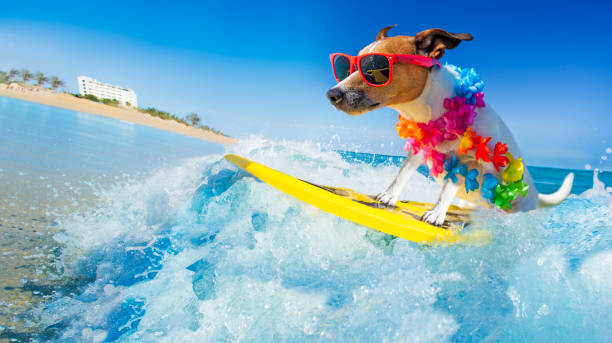

In [ ]:
image

In [ ]:
#prompt = "USER: <|image_1|> \n What are these?\n ASSISTANT:"

prompt = "USER: <|image_1|>\n What is shown in this image??\n ASSISTANT:"

In [ ]:

inputs = processor(prompt, [image], return_tensors="pt").to(device)

In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)


 A dog wearing sunglasses and a lei, riding a surfboard on a wave.
